## Streamlit Basics

Streamlit is a Python library that allows you to create web-apps and dashboard by just writing Python code. It provides you with a wide range of UI widgets and layouts that can be used to build user- interfaces. Your streamlit app is just a regular Python file with a .py extension.

### Installation and Setting up the Environment

You need to install the streamlit package to create the app. We will be using Anaconda to install streamlit and related packages on your machine. Please review the [Anaconda Installation Guide](https://courses.spatialthoughts.com/python-foundation.html#installation-and-setting-up-the-environment) for step-by-step instructions.

1. Once you have installed Anaconda, open Anaconda Prompt or a Terminal and run the following commands :

In [ ]:
conda update --all
conda create --name streamlit -y
conda activate streamlit

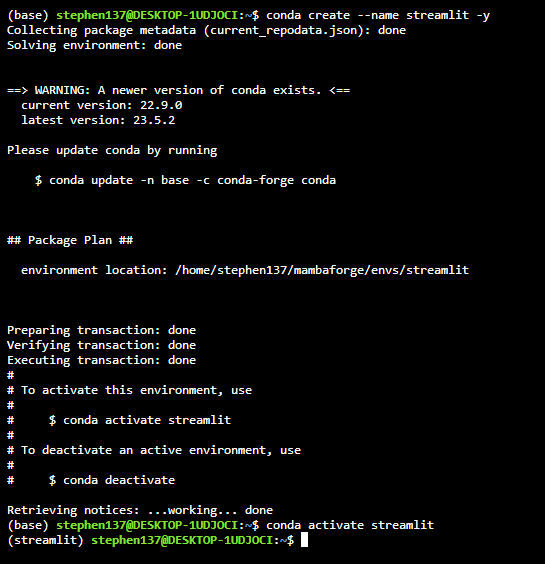

2. Now your environment is ready. We will install the required packages. First install geopandas :

In [ ]:
conda install -c conda-forge geopandas  -y

3. Next we will install streamlit and leafmap.

In [ ]:
pip install streamlit streamlit-folium leafmap

4. After the installation is done, run the following command :

In [ ]:
streamlit hello

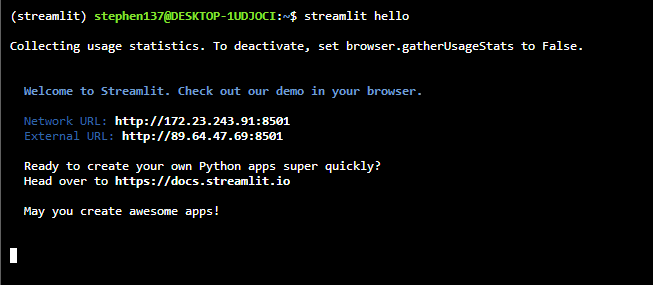

A new browser tab will open and display the streamlit Hello app.

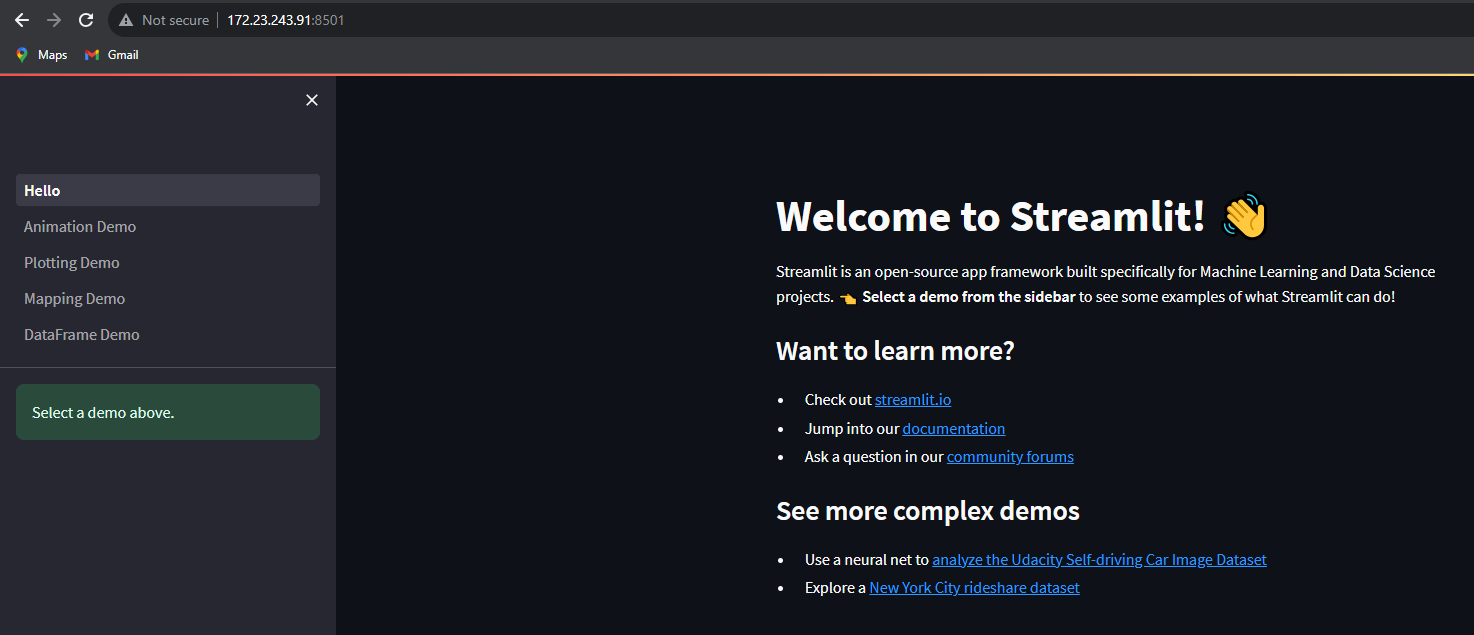

Your installation is now complete. You can close the terminal window to stop the streamlit server.

### Create a Simple Dashboard

Let’s create a simple interactive dashboard by loading a CSV file and displaying a chart with some statistics. We will get familiar with the streamlit app development workflow and explore different widgets and layout elements.

1. Create a folder named **simple_dashboard** on your Desktop.

2. Open your favorite text editor and create a file with the following content. By convention, we import streamlit as st. Then we can use the `st.title()` to display the title of our dashboard and `st.write()` to add a paragraph of text. Save the file in the `simple_dashboard` folder on your desktop as `app.py`.

`app.py`

In [ ]:
import streamlit as st

st.title('A Simple Dashboard')
st.write('This dashboard displays a chart for the selected region.')

3. Once the file is saved, open Anaconda Prompt (Windows) or Terminal (Mac/Linux). Switch to the conda environment where you have installed the required packages. We then use `cd` command to change the current directory to the once with the `app.py` file. Then run the following command to start the streamlit server and launch the app.

In [ ]:
streamlit run app.py

4. A new browser tab will open and display the output of the app :

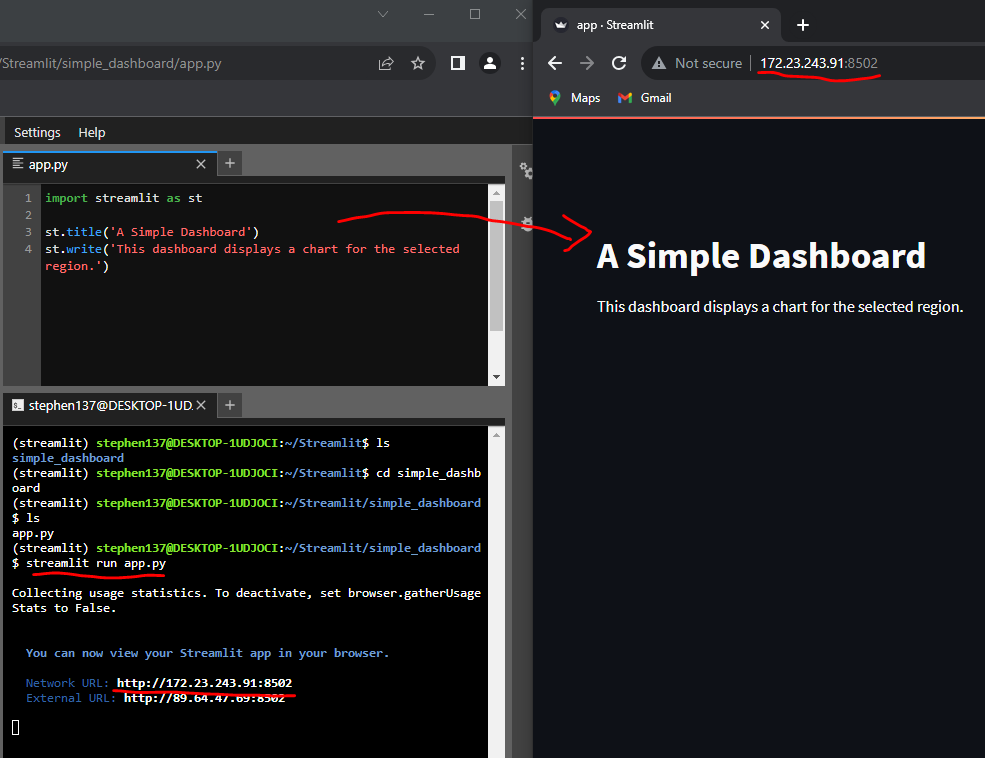

5. Let’s read some data and display it. We load a CSV file from a URL using Pandas and get a DataFrame object. We then use `st.dataframe()` widget to render the dataframe. Update your `app.py` with the following code. As you save the file, you will notice that streamlit will detect it and display a prompt to re-run your app. Choose Always rerun.

`app.py`

In [ ]:
import streamlit as st
import pandas as pd


st.title('A Simple Dashboard')
st.write('This dashboard displays a chart for the selected region.')


data_url = 'https://storage.googleapis.com/spatialthoughts-public-data/python-dataviz/osm/'
csv_file = 'highway_lengths_by_district.csv'

url = data_url + csv_file
df = pd.read_csv(url)

st.dataframe(df)

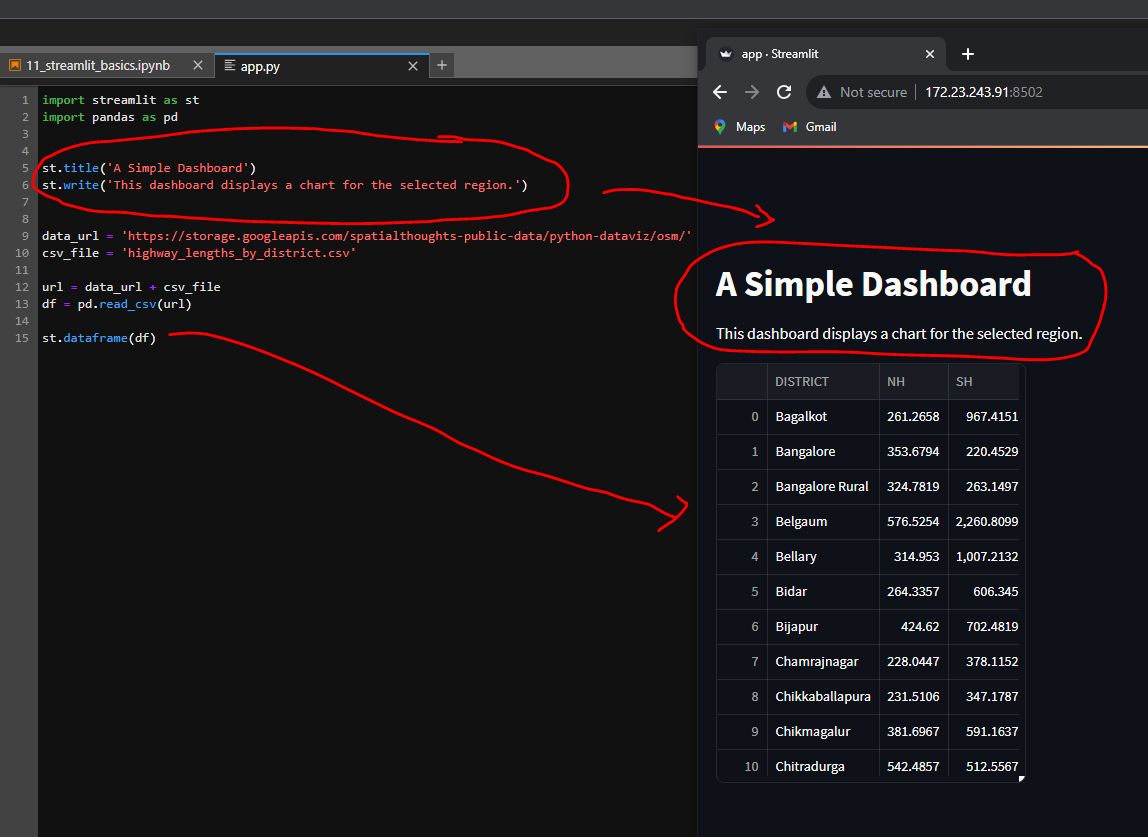

7. Let’s add a dropdown menu with the list of admin regions. We first get the names from the DISTRICT column and use `st.selectbox()` to add a dropdown selector. Streamlit apps always run the entire `app.py` whenever any selection is changed. With our current app structure, whenever the user selected a new admin region, the source file will be fetched again and a new dataframe will be created. This is not required as the source data does not change on every interaction. A good practice is to put the data fetching in a function and use the `@st.cache_data` decorator which will cache the results. Anytime the function is called with the same arguments, it will return the cached version of the data instead of fetching it.

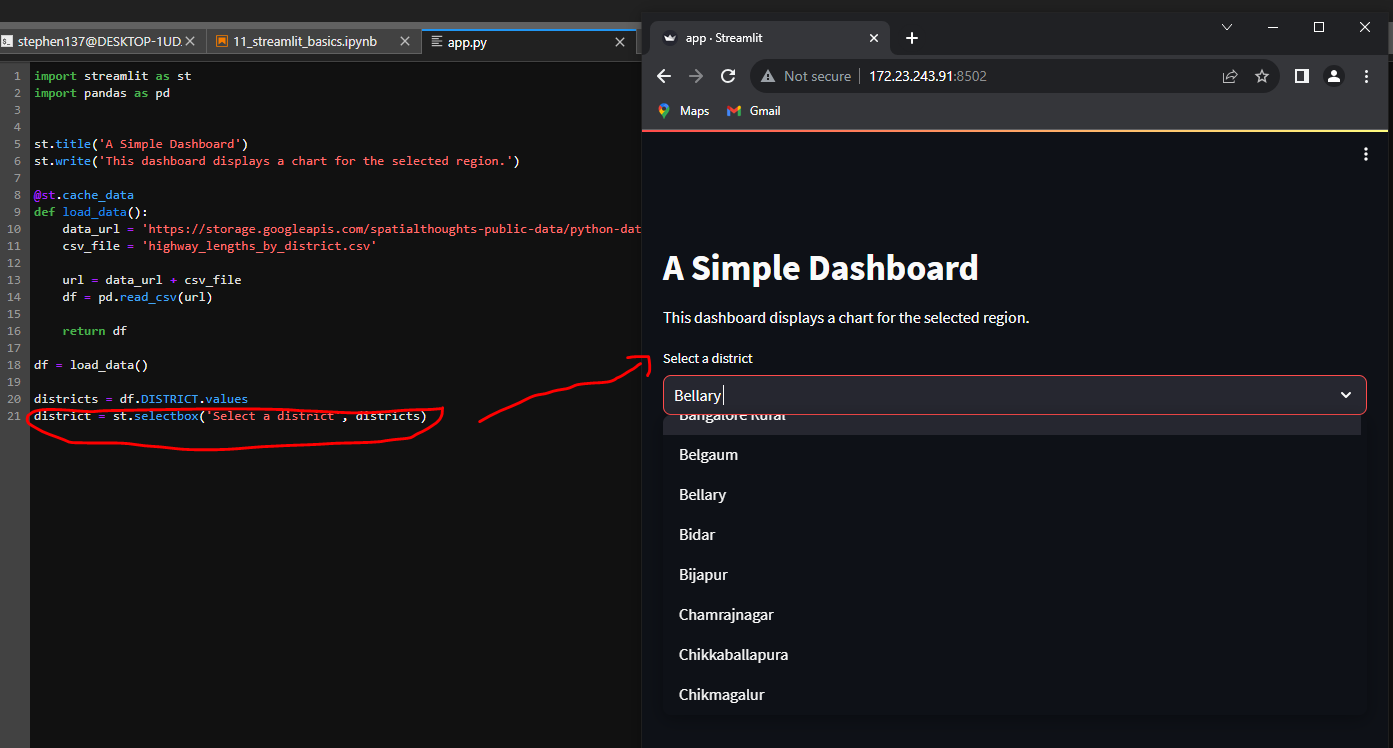

8. As the user selects an admin region from the selectbox, the selected value is saved in the district variable. We use it to filter the DataFrame to the selected district. Then we use Matplotlib to create a bar-chart with the filtered dataframe and display it using `st.pyplot()` widget.

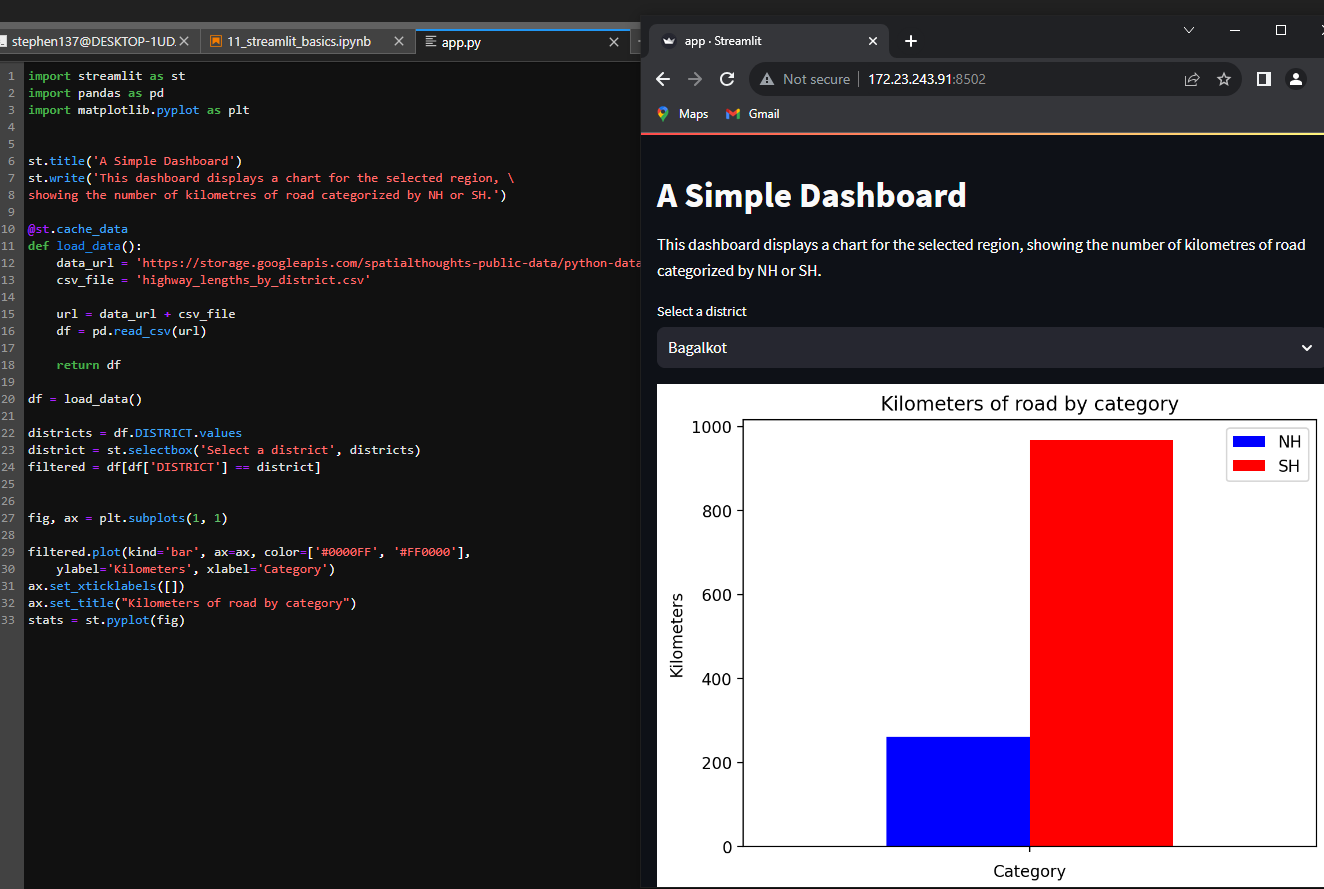

9. Our dashboard now displays an updated chart every-time you change the selection. Streamlit provides many other user-interface widgets. Let’s explore some more of them. We will use `st.color_picker()` widget to allow users to customize the color of the bar chart. We can display 2 color-pickers side-by-side using a column layout. We use `st.columns()` to create 2 columns `col1` and `col2`. We add a `color_picker()` to each column with appropriate label and a default color. If we have more than 1 widget of the same type in the app, we need to provide a unique key that can be used to identify the widget. We make some final tweaks to the chart and complete the dashboard.

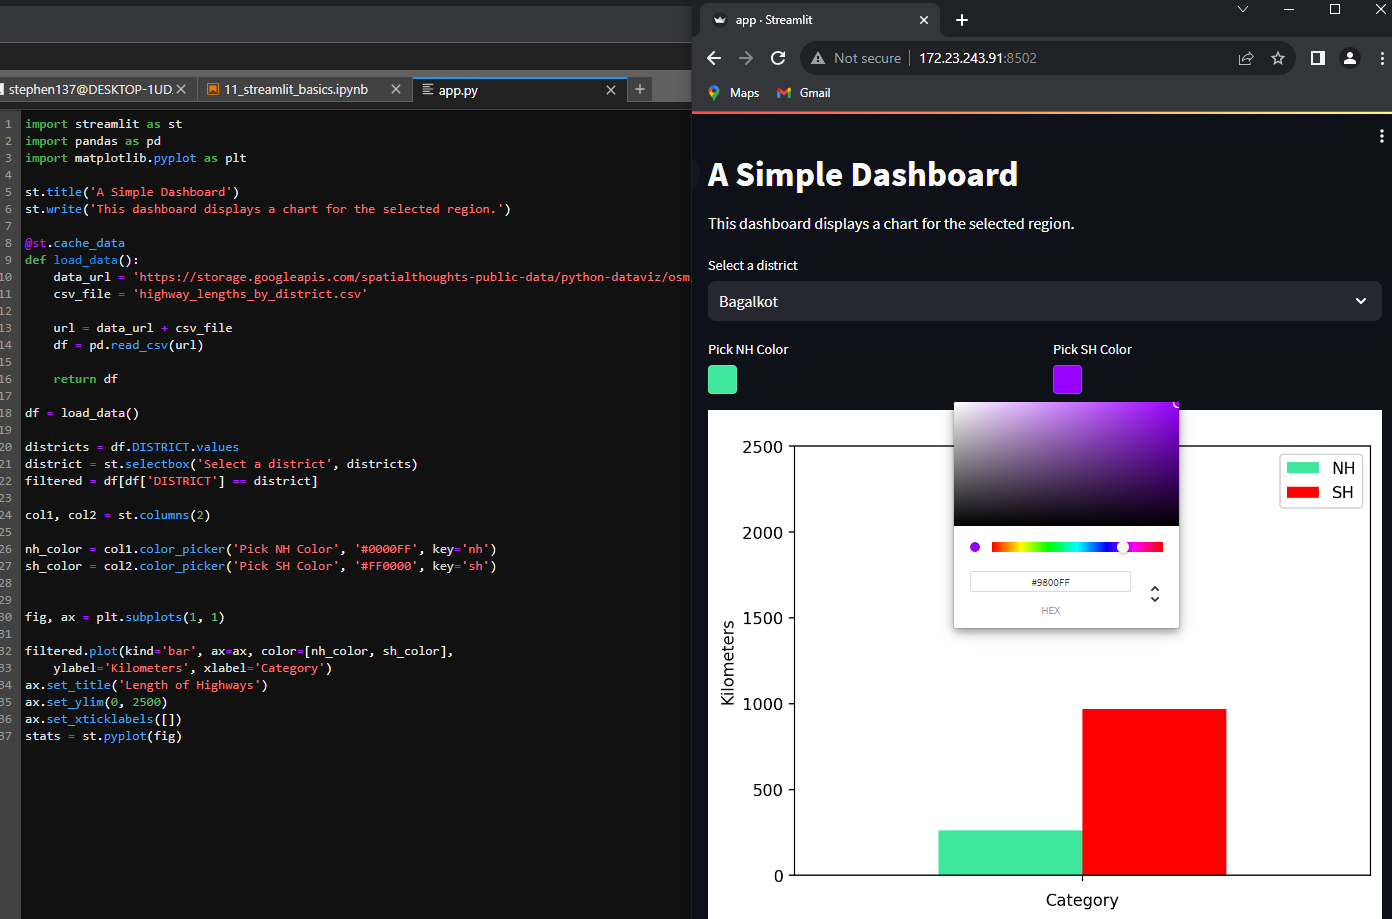

## Exercise

Add a radio-button to the app that allows the user to select the units for length between Kilometers and Miles as shown below. As the user toggles the radio-button, you should apply the appropriate conversion from Kilometer to Miles and update the chart.

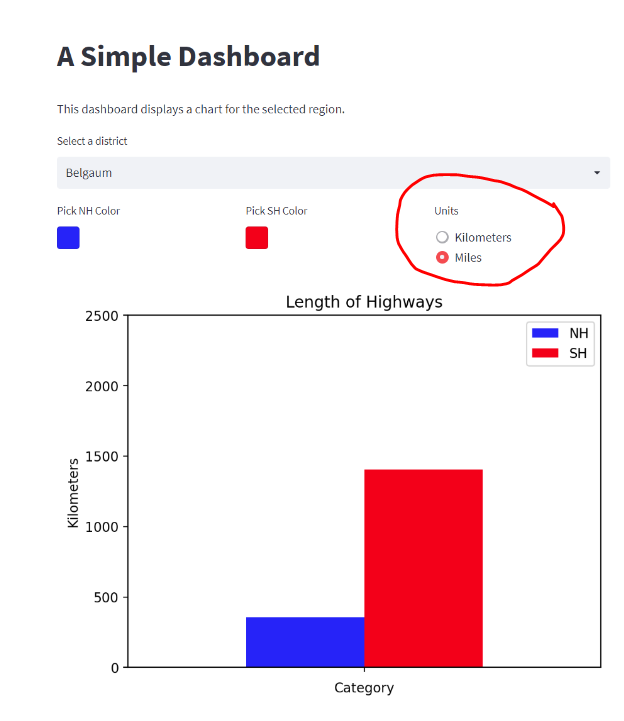

## My Solution

`app.py`

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Title / Intro
st.title('A Simple Dashboard')
st.write('This dashboard displays a chart for the selected region.')

# Customized data ingest function to create a pondas DataFrame from csv held on web
@st.cache_data
def load_data():
    data_url = 'https://storage.googleapis.com/spatialthoughts-public-data/python-dataviz/osm/'
    csv_file = 'highway_lengths_by_district.csv'

    url = data_url + csv_file
    # create a pandas DataFrame
    df = pd.read_csv(url)
    
    return df

# Run our data ingest function
df = load_data()

# Define our columns to be allocated to widgets
col1, col2, col3 = st.columns(3)

# Allow user to choose colour of columns
nh_color = col1.color_picker('Pick NH Color', '#0000FF', key='nh')
sh_color = col2.color_picker('Pick SH Color', '#FF0000', key='sh')

# Add a dropdown for district selection and filter dataset based on user choice
districts = df.DISTRICT.values
district = st.selectbox('Select a district', districts)
filtered = df[df['DISTRICT'] == district] 

# Add a radio button for unit of measurement selection and filter dataset based on user choice
unit = st.radio('Units', ['Kilometres','Miles'])
filtered = filtered[['NH', 'SH']]*0.621371

# Conditional argument to determine which measurement values to show
if unit == "Kilometres" :
    filtered = df[df['DISTRICT'] == district] 
else:
    filtered = filtered[['NH', 'SH']]*0.621371

# Visualize the user selection
fig, ax = plt.subplots(1, 1)

filtered.plot(kind='bar', ax=ax, color=[nh_color, sh_color],
    ylabel=unit, xlabel='Category')
ax.set_title('Length of Highways')
ax.set_ylim(0, 2500)
ax.set_xticklabels([])
stats = st.pyplot(fig)

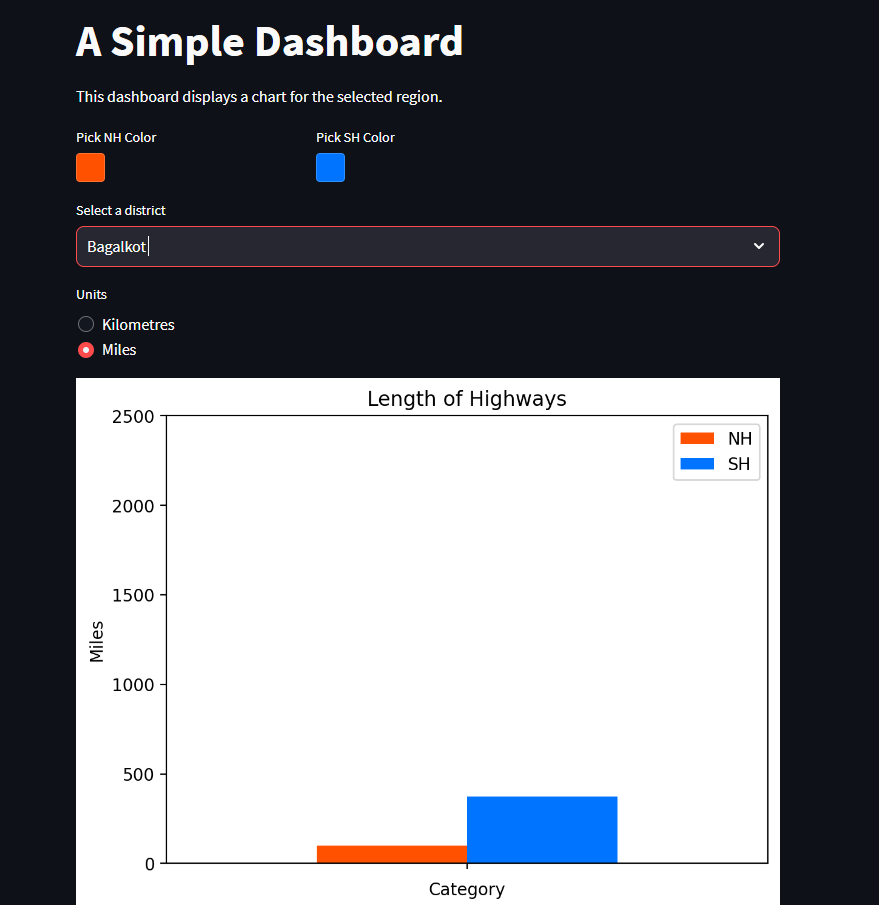